# 정기구독 수와 정보(속옷 사이즈) 입력한 사람 수 관계 사이의 인과성 분석.

### 해당 속옷 쇼핑몰 비즈니스의 이해
해당 속옷 쇼핑몰에서 가장 전면에 내세우고 있는 서비스는 데이터를 이용한 고객의 맞춤 속옷(취양, 사이즈 등)을 정기적인으로 판매하는 것이다. 정기적인 구매를 위해 구독이라는 수익모델을 취하고 있으며, 구독모델 사용시 더 많은 데이터도 축적이 가능하여 선순환을 이루고 있다.


### 배경
1. 해당 속옷 쇼핑몰에서 가장 중요한 요소는 구독 서비스이다.
2. 그 구독 서비스를 소비자가 구매하기 위해선 가슴사이즈 입력이 선행되어야 한다.
3. 그럼 가슴사이즈 입력한 사람의 수가 서비스 구독자의 수에 영향을 미치는지 아니면 서비스 구독자의 수가 가슴사이즈 입력한 사람의 수에 영향을 미치는지 어떤 상관관계로 이루어져 있는지를 파악해보자


### 가정
가슴사이즈의 입력 수가 구독 수에 또는 구독 수가 가슴사이즈의 입력 수에 영향을 미칠 것이고, 시계열적인 영향도 있을 것이다.


### 분석 절차
1. 데이터 범위 : 메일로 제공받은 데이터
2. 데이터 가공 : 
  - 같은 아이디는 중복 카운트 되면 안되기 때문에 구독을 위로 정렬 후 같은 ID 중복제거
  - 날짜별로 분석을 위한 가슴사이즈 입력한 사람 수, 볼륨제거 사람 수 데이터 프레임으로 출력
  - 가슴사이즈 입력 수와 구독자 수가 비슷하여 다른점을 찾기 어려우므로 정상성을 확보하기위해 비정상성 차수를 추론
  - 데이터가 많지 않고 그래프로 봤을때 계절성이 없기 때문에 정상성 테스트 중 계절성의 정상성을 보는 KPSS 테스트는 진행하지 않으며 트랜드의 정상성을 보는 ADF 테스트로만 진행
  - ADF 테스트 결과 가슴사이즈 입력 수와 구독자 수 모두 유의확률이 0.05보다 크므로 귀무가설을 채택하여 1차 차분 진행
  - 1차 차분후 ADF 테스트 결과 유의수준이 0.05보다 매우 작아 귀무가설을 기각하여 정상성 확보
3. 분석
  - 그랜져 인과관계를 분석하기 위해 grangercausalitytests 알고리즘을 사용하여 분석 실행


### 해석
구독자 수에 대한 가슴사이즈 입력 수와 가슴사이즈 입력 수에 대한 구독자 수의 모두 유의수준 5%에서
F-test, chi2 test, likelihood ratio test 가 모두 유의확률이 0.05보다 높다.
그러므로  가슴사이즈 입력하는 사람과 구독하는 사람은 서로 영향을 미치지 않는다고 할 수 있다.

만약 넓게 잡아 유의수준을 10%로 잡게 되면
가슴사이즈를 입력하는 사람 수는 구독자 수에 1일까지 영향을 준다고 할 수 있으며,
구독자 수는 가슴사이즈를 입력하는 사람 수에 1일까지 영향을 준다고 할 수 있으다.
2일, 3일은 서로에대해 시간적으로 영향을 미치지 않는다고 볼 수 있다.



## 해결책
1. 구독의 관점에서만 보면 하루만에 가슴사이즈 입력이나 구독을 시킨다.
  - 마케팅
    - 하루에 효과를 볼 수 있는 단기성 마케팅 이벤트를 진행한다. 
  - UX/UI
    - UX/UI 전면 배치 및 지루하지 않게 개발
    - 고객의 9가지 카테고리의 가슴사이즈 입력의 귀찮음 해결한다.
  - 보상체계
    - 가슴입사이즈 입력시 혜택을 준다.(정보, 상품, 마일리지 등)
2. 가슴사이즈 입력 수와 구독 수의 비율을 맞춰서 성장시킨다.
  - 비용의 문제가 있겠지만 둘을 최대 성장 비율에 맞춰서 늘리는 방안을 생각해야한다.
  - 가슴사이즈 입력 수에 비해 구독수가 적으면 구독 수를 늘리는 마케팅을 실행해야하며,
    구독 수에 비해 가슴사이즈 입력 수 비율이 적으면 가슴사이즈를 늘리는 마케팅을 실행해야 한다.
    
3. 가슴사이즈 입력과 구독 수의 미치는 영향의 기간을 증가시킨다.
   (기간이 늘어나면 가슴사이즈 입력자와 구독 수가 늘어나는 것이랑 같은 효과가 난다.)
  - 가슴사이즈 입력 변수와 구독 수의 변수에 유의한 추가적인 피쳐가 필요하다. 데이터로 되어 있는 모든 피쳐를 가슴사이즈 입력 변수 그리고 구독 수와 그래프를 그려 어떤 상관성이 있는지 파악해야 한다.

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import statsmodels.api as sm

import warnings
warnings.filterwarnings('ignore')

In [2]:
total_df = pd.DataFrame()
payment_df = pd.read_csv('./payment_window.csv', encoding='CP949')
bra_df = pd.read_csv('./bra_size_window.csv', encoding='CP949')
user_df = pd.read_csv('./user_window.csv', encoding='CP949')
pay_bra_df = pd.merge(payment_df, bra_df, how='outer', on='user_idx')
total_df = pd.merge(pay_bra_df, user_df, on='user_idx')
drop_cols = ['Unnamed: 0_x', 'Unnamed: 0', 'Unnamed: 0_y']
total_df.drop(drop_cols, axis=1, inplace=True)
total_df.reset_index(drop=True, inplace=True)

total_df['paid_date'] = pd.to_datetime(total_df['paid_date'])
total_df['joined_date'] = pd.to_datetime(total_df['joined_date'])
total_df['created_date'] = pd.to_datetime(total_df['created_date'])

In [13]:
print(total_df.shape)
display(total_df.head())
display(total_df.describe(include='all').T)
print(total_df.info())

(17199, 11)


,user_idx,subscription_type,cart_discount_price,order_shipping_price,order_total_price,paid_date,size,created_date,status,third_party_join_type,joined_date
0,0973f573635c1b55a58f1d221f992bfeb0b3e007a93efb...,구독,5100.0,3000.0,12900.0,2020-10-21,80A,2020-09-25 20:30:29+09:00,0,NaN,2020-09-21 16:07:34+09:00
1,305181c0babb5077b46ccb298a41469729a6760b19e44d...,구독,5100.0,3000.0,12900.0,2020-10-09,75B,2020-10-21 22:49:35+09:00,0,NaN,2020-10-09 23:38:44+09:00
2,5fa450bdb2e831617f0132293d63638e0f93f1f62af4ca...,구독,5100.0,3000.0,12900.0,2020-10-11,80C,2020-10-21 05:11:29+09:00,0,NaN,2020-10-11 13:20:13+09:00
3,85649b91d8ac8d2e84faa6c54032254356fe02c69d5fa0...,구독,5100.0,3000.0,12900.0,2020-10-14,80B,2020-10-21 05:11:29+09:00,0,NaN,2020-10-14 22:35:15+09:00
4,05afd1abc70fce9afaa18482a0bb9c6cb082e65b1e0ab4...,구독,5100.0,3000.0,12900.0,2020-10-21,70A,2020-10-24 01:05:30+09:00,0,NaN,2020-10-21 19:38:04+09:00


,count,unique,top,freq,first,last,mean,std,min,25%,50%,75%,max
user_idx,17199,15512,27035b5f516880b9dc2f8c72cf7fdef9575bca6cbc5ab3...,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
subscription_type,7277,1,구독,7277,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cart_discount_price,7308,NaN,NaN,NaN,NaN,NaN,3267.94,2729.68,0,0,5100,5100,15000
order_shipping_price,7308,NaN,NaN,NaN,NaN,NaN,2970.44,296.325,0,3000,3000,3000,3000
order_total_price,7308,NaN,NaN,NaN,NaN,NaN,14658.9,3071.58,0,12900,12900,18000,27900
paid_date,7308,55,2020-10-05 00:00:00,245,2020-08-31 00:00:00,2020-10-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
size,16588,67,75A,2806,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
created_date,16602,11109,2020-10-20 05:05:06+09:00,1538,2019-07-19 19:31:03+09:00,2020-11-25 23:53:38+09:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
status,17199,NaN,NaN,NaN,NaN,NaN,0.00883772,0.0935956,0,0,0,0,1
third_party_join_type,1392,1197,f2c9624d306af15e02cb98a8a6ff2e783048a50f4a89af...,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17199 entries, 0 to 17198
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype                                
---  ------                 --------------  -----                                
 0   user_idx               17199 non-null  object                               
 1   subscription_type      7277 non-null   object                               
 2   cart_discount_price    7308 non-null   float64                              
 3   order_shipping_price   7308 non-null   float64                              
 4   order_total_price      7308 non-null   float64                              
 5   paid_date              7308 non-null   datetime64[ns]                       
 6   size                   16588 non-null  object                               
 7   created_date           16602 non-null  datetime64[ns, pytz.FixedOffset(540)]
 8   status                 17199 non-null  int64                      

# 가슴사이즈 입력 수와 구독자 수의 관계

,created_date,subscription_type
Paid_Date,,
2020-08-31,1.0,1.0
2020-09-07,1.0,1.0
2020-09-09,2.0,2.0
2020-09-10,1.0,1.0
2020-09-11,1.0,1.0


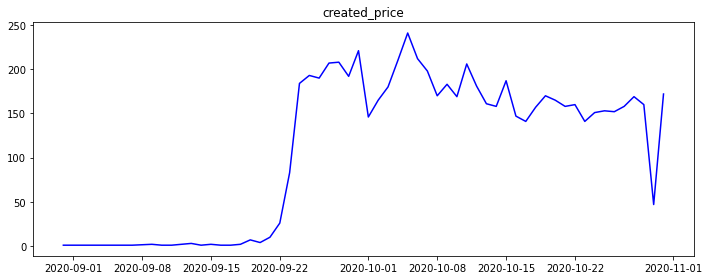

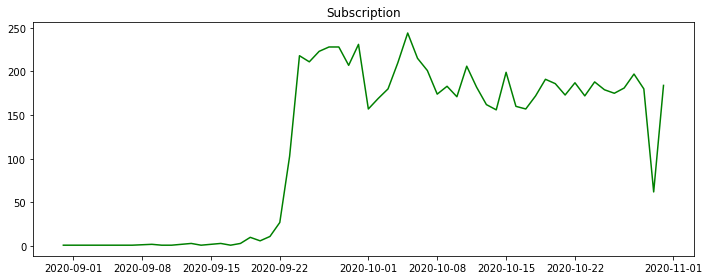

[정상성 테스트]

가슴사이즈 입력 수 ADF 테스트 유의수준 :  0.3643735633344212
구독자 수 ADF 테스트 유의수준:  0.3625745354585992
1번 차분 후 가슴사이즈 입력 수 ADF 테스트 유의수준:  5.743699859008164e-12
1번 차분 후 구독자 수 ADF 테스트 유의수준:  4.5308283327912076e-11


,created_date,subscription_type
Paid_Date,,
2020-09-07,0.0,0.0
2020-09-09,1.0,1.0
2020-09-10,-1.0,-1.0
2020-09-11,0.0,0.0
2020-09-12,1.0,1.0


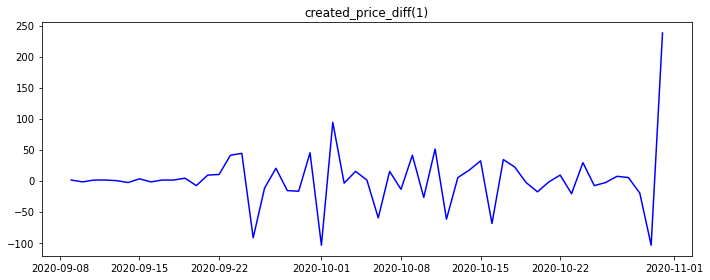

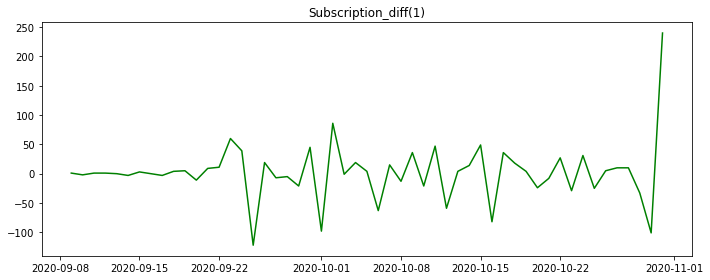

[구독자 수 -> 가슴사이즈 입력 수]

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.9381  , p=0.0928  , df_denom=49, df_num=1
ssr based chi2 test:   chi2=3.1180  , p=0.0774  , df=1
likelihood ratio test: chi2=3.0281  , p=0.0818  , df=1
parameter F test:         F=2.9381  , p=0.0928  , df_denom=49, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.2993  , p=0.2825  , df_denom=46, df_num=2
ssr based chi2 test:   chi2=2.8811  , p=0.2368  , df=2
likelihood ratio test: chi2=2.8026  , p=0.2463  , df=2
parameter F test:         F=1.2993  , p=0.2825  , df_denom=46, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.4835  , p=0.2325  , df_denom=43, df_num=3
ssr based chi2 test:   chi2=5.1749  , p=0.1594  , df=3
likelihood ratio test: chi2=4.9243  , p=0.1774  , df=3
parameter F test:         F=1.4835  , p=0.2325  , df_denom=43, df_num=3

[가슴사이즈 입력 수 -> 구독자 수]

Granger Causality
number of lags (no zero) 1
ssr based

In [172]:
# 구독을 한 사람은 가슴사이즈를 입력했기 때문에 가장 먼저 위로 올리고 중복제거
total_df.sort_values(by='subscription_type', ascending=True)
total_df.drop_duplicates(subset=['user_idx'], keep='first')

# 매출일을 인덱스로 설정
total_df['Paid_Date'] = pd.to_datetime(total_df['paid_date'])

# 날짜별로 그룹을 묶은 후 사람 수 카운트
total_created_df = total_df.groupby(by='Paid_Date')[['created_date']].count()
total_subs_df = total_df.groupby(by='Paid_Date')[['subscription_type']].count()
total_created_subs_df = pd.concat([total_created_df,total_subs_df], axis=1)
total_created_subs_df = total_created_subs_df.asfreq('D')
total_created_subs_df.dropna(inplace=True)
display(total_created_subs_df.head())

# 그래프 출력
plt.figure(figsize=(10,4))
plt.title('created_price')
plt.plot(total_created_subs_df['created_date'] , 'b')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10,4))
plt.title('Subscription')
plt.plot(total_created_subs_df['subscription_type'] , 'g')
plt.tight_layout()
plt.show()

# 비정상성 차수 추론
print('[정상성 테스트]\n')
target = total_created_subs_df['created_date']
integ_result = pd.Series(sm.tsa.stattools.adfuller(target)[0:4], 
                         index=['Test Statistics', 'p-value', 'Used Lag', 'Used Observations'])
print('가슴사이즈 입력 수 ADF 테스트 유의수준 : ', integ_result[1])
target = total_created_subs_df['subscription_type']
integ_result = pd.Series(sm.tsa.stattools.adfuller(target)[0:4], 
                         index=['Test Statistics', 'p-value', 'Used Lag', 'Used Observations'])
print('구독자 수 ADF 테스트 유의수준: ', integ_result[1])
print('========================================================')

target = total_created_subs_df['created_date'].diff(1).dropna()
integ_result = pd.Series(sm.tsa.stattools.adfuller(target)[0:4], 
                         index=['Test Statistics', 'p-value', 'Used Lag', 'Used Observations'])
print('1번 차분 후 가슴사이즈 입력 수 ADF 테스트 유의수준: ', integ_result[1])
target = total_created_subs_df['subscription_type'].diff(1).dropna()
integ_result = pd.Series(sm.tsa.stattools.adfuller(target)[0:4], 
                         index=['Test Statistics', 'p-value', 'Used Lag', 'Used Observations'])
print('1번 차분 후 구독자 수 ADF 테스트 유의수준: ', integ_result[1])

# 1번 차분하여 정상성으로 변경
total_diff_created_subs_df = total_created_subs_df.diff(1).dropna()
display(total_diff_created_subs_df.head())

plt.figure(figsize=(10,4))
plt.title('created_price_diff(1)')
plt.plot(total_diff_created_subs_df['created_date'].diff(1).dropna(), 'b')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10,4))
plt.title('Subscription_diff(1)')
plt.plot(total_diff_created_subs_df['subscription_type'].diff(1).dropna(), 'g')
plt.tight_layout()
plt.show()

# 그렌져 인과관계
print('[구독자 수 → 가슴사이즈 입력 수]')
granger_result1 = sm.tsa.stattools.grangercausalitytests(total_diff_created_subs_df.diff(1).dropna().values,
                                                         maxlag=3, verbose=True)
print('\n[가슴사이즈 입력 수 → 구독자 수]')
granger_result2 = sm.tsa.stattools.grangercausalitytests(total_diff_created_subs_df.diff(1).dropna().iloc[:,[1,0]].values,
                                                         maxlag=3, verbose=True)
